In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_set = pd.read_csv(r'E:\ThisPC\Desktop\2019 Fall\CS 4661\Data-Science-master\Data-Science-master\Supplemental Files\House_Prices.csv')
print(data_set.head())

# Our Data
X = data_set['LotArea']
y = data_set['SalePrice']
#print(X.size)
#print(y.size)

from scipy.interpolate import *
p1 = np.polyfit(X,y,1)


import operator
import matplotlib.pyplot as plt
plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y), key=sort_axis)
x, y = zip(*sorted_zip)
plt.plot(X, y, color='m')
plt.show()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

<Figure size 640x480 with 1 Axes>

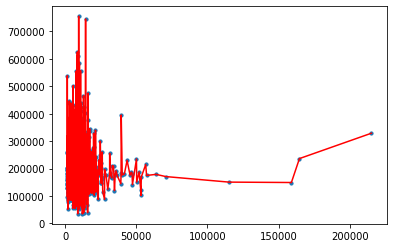

In [2]:
# Lining through every point
from numpy import *

#X = ([1,3,5,7,8,15,11,13])
#y = ([.1,.2,.3,.4,.5,.6,.7,.8])

from scipy.interpolate import *
p1 = polyfit(X,y,1)


import operator
import matplotlib.pyplot as plt
plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y), key=sort_axis)
X, y = zip(*sorted_zip)
plt.plot(X, y, color='r')
plt.show()

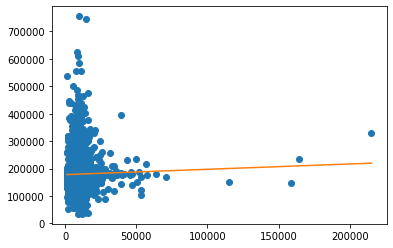

In [3]:
# Polynomial Agreesion but now only in linear form
plt.plot(X,y,'o')
plt.plot(X,polyval(p1,X))

In [4]:
# Quadractic fit and Poly fit
p2 = polyfit(X,y,2)
p3 = polyfit(X,y,3)
print(p1)
print(p2)
print(p3)

[1.93782277e-01 1.78082454e+05]
[ 2.65141434e-06 -1.28230334e-01  1.80917710e+05]
[ 5.25829471e-11 -9.59045709e-06  3.05384352e-01  1.78049961e+05]


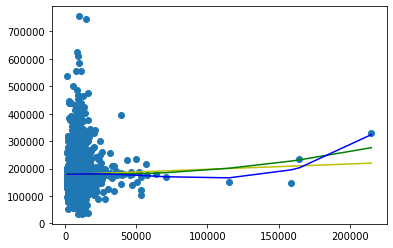

In [5]:
# Polynomial Agression 
plt.plot(X,y,'o')
plt.plot(X,polyval(p1,X), color='y') # Linear
plt.plot(X,polyval(p2,X), color='g') # Quadratic
plt.plot(X,polyval(p3,X), color='b') # Polynomial

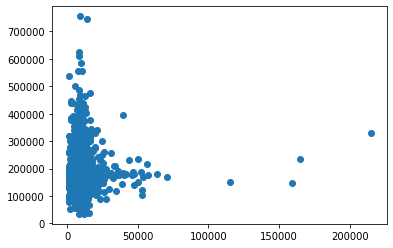

In [6]:
# Polynomial Agression Smoother using linspace()
plt.plot(X,y,'o')
Xp = linspace(-2,16,100)
plt.plot(Xp,polyval(p1,Xp), color='y') # Linear
plt.plot(Xp,polyval(p2,Xp), color='g') # Quadratic
plt.plot(Xp,polyval(p3,Xp), color='b') # Polynomial

In [7]:
# Couldn't get this to work
# Linear fit Another Way
#yfit = p1[0] * X + p1[1]
#print(yfit)
#print(y)